In [1]:
"""
Binary Claaification Example
Data : IMDB, Internet Movie Database
"""
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 10s 1us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# 리뷰 데이터를 원래 영단어로 바꾸기
word_index = imdb.get_word_index()
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reversed_word_index.get(i-3, "?") for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [14]:
import numpy as np

print(len(train_data), len(test_data))

25000 25000


In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print(y_train, y_test)

[1. 0. 0. ... 0. 1. 0.] [0. 1. 1. ... 0. 0. 0.]


In [21]:
# Define Model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,))) #input_shape는 first dimension은 무시함
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [22]:
# 검증 세트 준비하기
# test set의 information leak를 피하기 위함
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.5462 - accuracy: 0.7781 - val_loss: 0.4273 - val_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3420 - accuracy: 0.8955 - val_loss: 0.3246 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2474 - accuracy: 0.9219 - val_loss: 0.2879 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1945 - accuracy: 0.9397 - val_loss: 0.2774 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1570 - accuracy: 0.9533 - val_loss: 0.2821 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1297 - accuracy: 0.9619 - val_loss: 0.3185 - val_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1089 - accuracy: 0.9693 - val_loss: 0.2964 - val_accuracy: 0.8840
Epoch 8/20
30

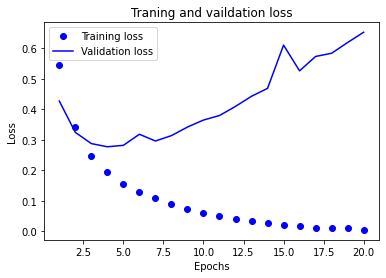

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Traning and vaildation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

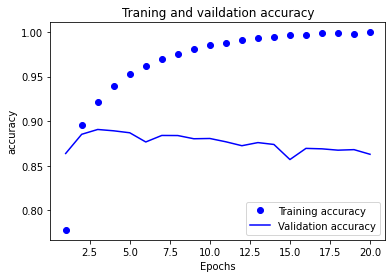

In [26]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Traning and vaildation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [27]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=4, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.6828 - val_accuracy: 0.8668
Epoch 2/4
30/30 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.7288 - val_accuracy: 0.8679
Epoch 3/4
30/30 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.7647 - val_accuracy: 0.8669
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.8795 - accuracy: 0.8449
[0.8795033693313599, 0.8448799848556519]


In [28]:
print(model.predict(x_test))

[[0.0047789 ]
 [1.        ]
 [0.5289381 ]
 ...
 [0.00210532]
 [0.00312059]
 [0.56891584]]
